# Notes

[Population data](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland)

[Poverty data](https://trustforlondon.org.uk/data/poverty-borough/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Load crime and population data

In [2]:
# Load crime data
historical_df  = pd.read_csv('data/borough-historical.csv')
recent_df = pd.read_csv('data/borough-recent.csv')

# Load population data
population_df = pd.read_csv('data/population.csv')
poverty_rate_df = pd.read_csv('data/poverty-rate.csv')

In [3]:
historical_df.head(2)

MajorText        MinorText    LookUp_BoroughName  201004  \
0  Arson and Criminal Damage            Arson  Barking and Dagenham       6   
1  Arson and Criminal Damage  Criminal Damage  Barking and Dagenham     208   

   201005  201006  201007  201008  201009  201010  ...  202101  202102  \
0       5      11      10       6       6      13  ...       4       6   
1     193     227     220     204     163     199  ...     100     104   

   202103  202104  202105  202106  202107  202108  202109  202110  
0       4       6       6       5       4      12       5       7  
1      80      99     128     141     130     144     111     126  

[2 rows x 142 columns]

In [4]:
recent_df.head(2)

MajorText        MinorText    LookUp_BoroughName  202111  \
0  Arson and Criminal Damage            Arson  Barking and Dagenham       6   
1  Arson and Criminal Damage  Criminal Damage  Barking and Dagenham     109   

   202112  202201  202202  202203  202204  202205  ...  202301  202302  \
0       1       4       4       3       5       5  ...       3       3   
1     116     126     110     116     126     120  ...      96     101   

   202303  202304  202305  202306  202307  202308  202309  202310  
0       2       2       5       2       5       8       5       4  
1     118     103     109     126     138     118     129      96  

[2 rows x 27 columns]

In [9]:
# Merging recent and historical data
df = pd.merge(historical_df, recent_df, on  = ['LookUp_BoroughName', 'MajorText', 'MinorText'], how = 'outer').fillna(0).sort_index(axis = 1)
df.head()

201004  201005  201006  201007  201008  201009  201010  201011  201012  \
0     6.0     5.0    11.0    10.0     6.0     6.0    13.0    13.0    14.0   
1   208.0   193.0   227.0   220.0   204.0   163.0   199.0   178.0   138.0   
2    49.0    58.0    59.0    47.0    46.0    51.0    52.0    62.0    49.0   
3   118.0   102.0   124.0   137.0   153.0   136.0   116.0   140.0   105.0   
4     9.0     6.0     5.0    12.0     9.0     7.0    11.0    11.0     4.0   

   201101  ...  202304  202305  202306  202307  202308  202309  202310  \
0     5.0  ...     2.0     5.0     2.0     5.0     8.0     5.0     4.0   
1   173.0  ...   103.0   109.0   126.0   138.0   118.0   129.0    96.0   
2    50.0  ...    36.0    28.0    30.0    25.0    32.0    41.0    30.0   
3   165.0  ...    63.0    50.0    65.0    50.0    75.0    86.0    71.0   
4     9.0  ...    25.0    26.0    36.0    21.0    16.0    20.0    33.0   

     LookUp_BoroughName                  MajorText  \
0  Barking and Dagenham  Arson and Criminal Damage   
1  Barking and Dagenham  Arson and Criminal Damage   
2  Barking and Dagenham                   Burglary   
3  Barking and Dagenham                   Burglary   
4  Barking and Dagenham              Drug Offences   

                         MinorText  
0                            Arson  
1                  Criminal Damage  
2  Burglary Business and Community  
3                Domestic Burglary  
4                 Drug Trafficking  

[5 rows x 166 columns]

In [10]:
# Data is in monthly format. If you want to aggregate to yearly to analyse yearly trends.

def aggregate_to_yearly(df:pd.DataFrame) -> pd.DataFrame:

    yearly_df = df.fillna(0).copy()

    # Loop through unique years present in the dataset
    years = {col[:4] for col in yearly_df.columns if col.isdigit()}

    for year in years:
        # List columns for that year
        monthly_columns = [col for col in yearly_df.columns if col.startswith(year)]
        
        # Sum the monthly columns and create a new yearly column
        yearly_df[year] = yearly_df[monthly_columns].sum(axis=1)
        
        yearly_df.drop(monthly_columns, axis=1, inplace=True)

    return yearly_df.sort_index(axis = 1)

yearly_df = aggregate_to_yearly(df)
yearly_df.head()

2010    2011    2012    2013    2014    2015    2016    2017    2018  \
0    84.0   132.0    75.0    52.0    65.0    77.0    74.0    78.0    58.0   
1  1730.0  2017.0  1613.0  1550.0  1553.0  1678.0  1816.0  1631.0  1392.0   
2   473.0   740.0   665.0   574.0   541.0   448.0   454.0   364.0   387.0   
3  1131.0  1625.0  1795.0  1669.0  1369.0  1184.0   840.0  1229.0  1285.0   
4    74.0    82.0    76.0    69.0    89.0    53.0    79.0    64.0    76.0   

     2019    2020    2021    2022    2023    LookUp_BoroughName  \
0    68.0    48.0    66.0    52.0    39.0  Barking and Dagenham   
1  1435.0  1276.0  1388.0  1433.0  1134.0  Barking and Dagenham   
2   361.0   282.0   267.0   284.0   303.0  Barking and Dagenham   
3  1185.0   935.0   924.0   867.0   649.0  Barking and Dagenham   
4    88.0   163.0   136.0   171.0   232.0  Barking and Dagenham   

                   MajorText                        MinorText  
0  Arson and Criminal Damage                            Arson  
1  Arson and Criminal Damage                  Criminal Damage  
2                   Burglary  Burglary Business and Community  
3                   Burglary                Domestic Burglary  
4              Drug Offences                 Drug Trafficking

# EDA

In [12]:
df['MajorText'].unique()

array(['Arson and Criminal Damage', 'Burglary', 'Drug Offences',
       'Historical Fraud and Forgery',
       'Miscellaneous Crimes Against Society', 'Possession of Weapons',
       'Public Order Offences', 'Robbery', 'Sexual Offences', 'Theft',
       'Vehicle Offences', 'Violence Against the Person'], dtype=object)

In [30]:
df = pd.merge(df, population_df, on = ['LookUp_BoroughName'], how = 'outer')
df = pd.merge(df, poverty_rate_df, on = ['LookUp_BoroughName'], how = 'outer')

yearly_df = pd.merge(yearly_df, population_df, on = ['LookUp_BoroughName'], how = 'outer')
yearly_df = pd.merge(yearly_df, poverty_rate_df, on = ['LookUp_BoroughName'], how = 'outer')

In [37]:
smajor_cat

201004  201005  201006  201007  201008  201009  201010  201011  201012  \
49       0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
50     189.0   196.0   186.0   194.0   183.0   175.0   155.0   144.0   136.0   
51     197.0   210.0   216.0   194.0   191.0   139.0   146.0   169.0   128.0   
104      0.0     0.0     0.0     1.0     0.0     2.0     1.0     2.0     1.0   
105    127.0   155.0   157.0   134.0   131.0   136.0   127.0   117.0   128.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1689   182.0   212.0   171.0   175.0   161.0   136.0   181.0   158.0   109.0   
1690   225.0   225.0   224.0   269.0   179.0   217.0   214.0   176.0   160.0   
1742     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1743   271.0   283.0   289.0   328.0   288.0   270.0   319.0   287.0   279.0   
1744   295.0   322.0   356.0   346.0   312.0   316.0   297.0   280.0   264.0   

      201101  ...  202305  202306  202307  202308  202309  202310  \
49       0.0  ...     1.0     0.0     0.0     0.0     0.0     0.0   
50     139.0  ...   207.0   214.0   198.0   202.0   213.0   179.0   
51     122.0  ...   478.0   503.0   467.0   470.0   459.0   413.0   
104      1.0  ...     0.0     0.0     1.0     1.0     1.0     1.0   
105    126.0  ...   202.0   224.0   240.0   175.0   212.0   194.0   
...      ...  ...     ...     ...     ...     ...     ...     ...   
1689   118.0  ...   233.0   241.0   219.0   208.0   237.0   226.0   
1690   139.0  ...   425.0   474.0   466.0   397.0   401.0   445.0   
1742     0.0  ...     0.0     1.0     0.0     0.0     0.0     0.0   
1743   268.0  ...   358.0   382.0   383.0   370.0   363.0   386.0   
1744   304.0  ...   618.0   616.0   708.0   640.0   605.0   771.0   

                        MajorText                MinorText  population  \
49    Violence Against the Person                 Homicide    218534.0   
50    Violence Against the Person     Violence with Injury    218534.0   
51    Violence Against the Person  Violence without Injury    218534.0   
104   Violence Against the Person                 Homicide    388639.0   
105   Violence Against the Person     Violence with Injury    388639.0   
...                           ...                      ...         ...   
1689  Violence Against the Person     Violence with Injury    328367.0   
1690  Violence Against the Person  Violence without Injury    328367.0   
1742  Violence Against the Person                 Homicide    205087.0   
1743  Violence Against the Person     Violence with Injury    205087.0   
1744  Violence Against the Person  Violence without Injury    205087.0   

      poverty_Rate  
49            0.29  
50            0.29  
51            0.29  
104           0.26  
105           0.26  
...            ...  
1689          0.34  
1690          0.34  
1742          0.43  
1743          0.43  
1744          0.43  

[99 rows x 167 columns]

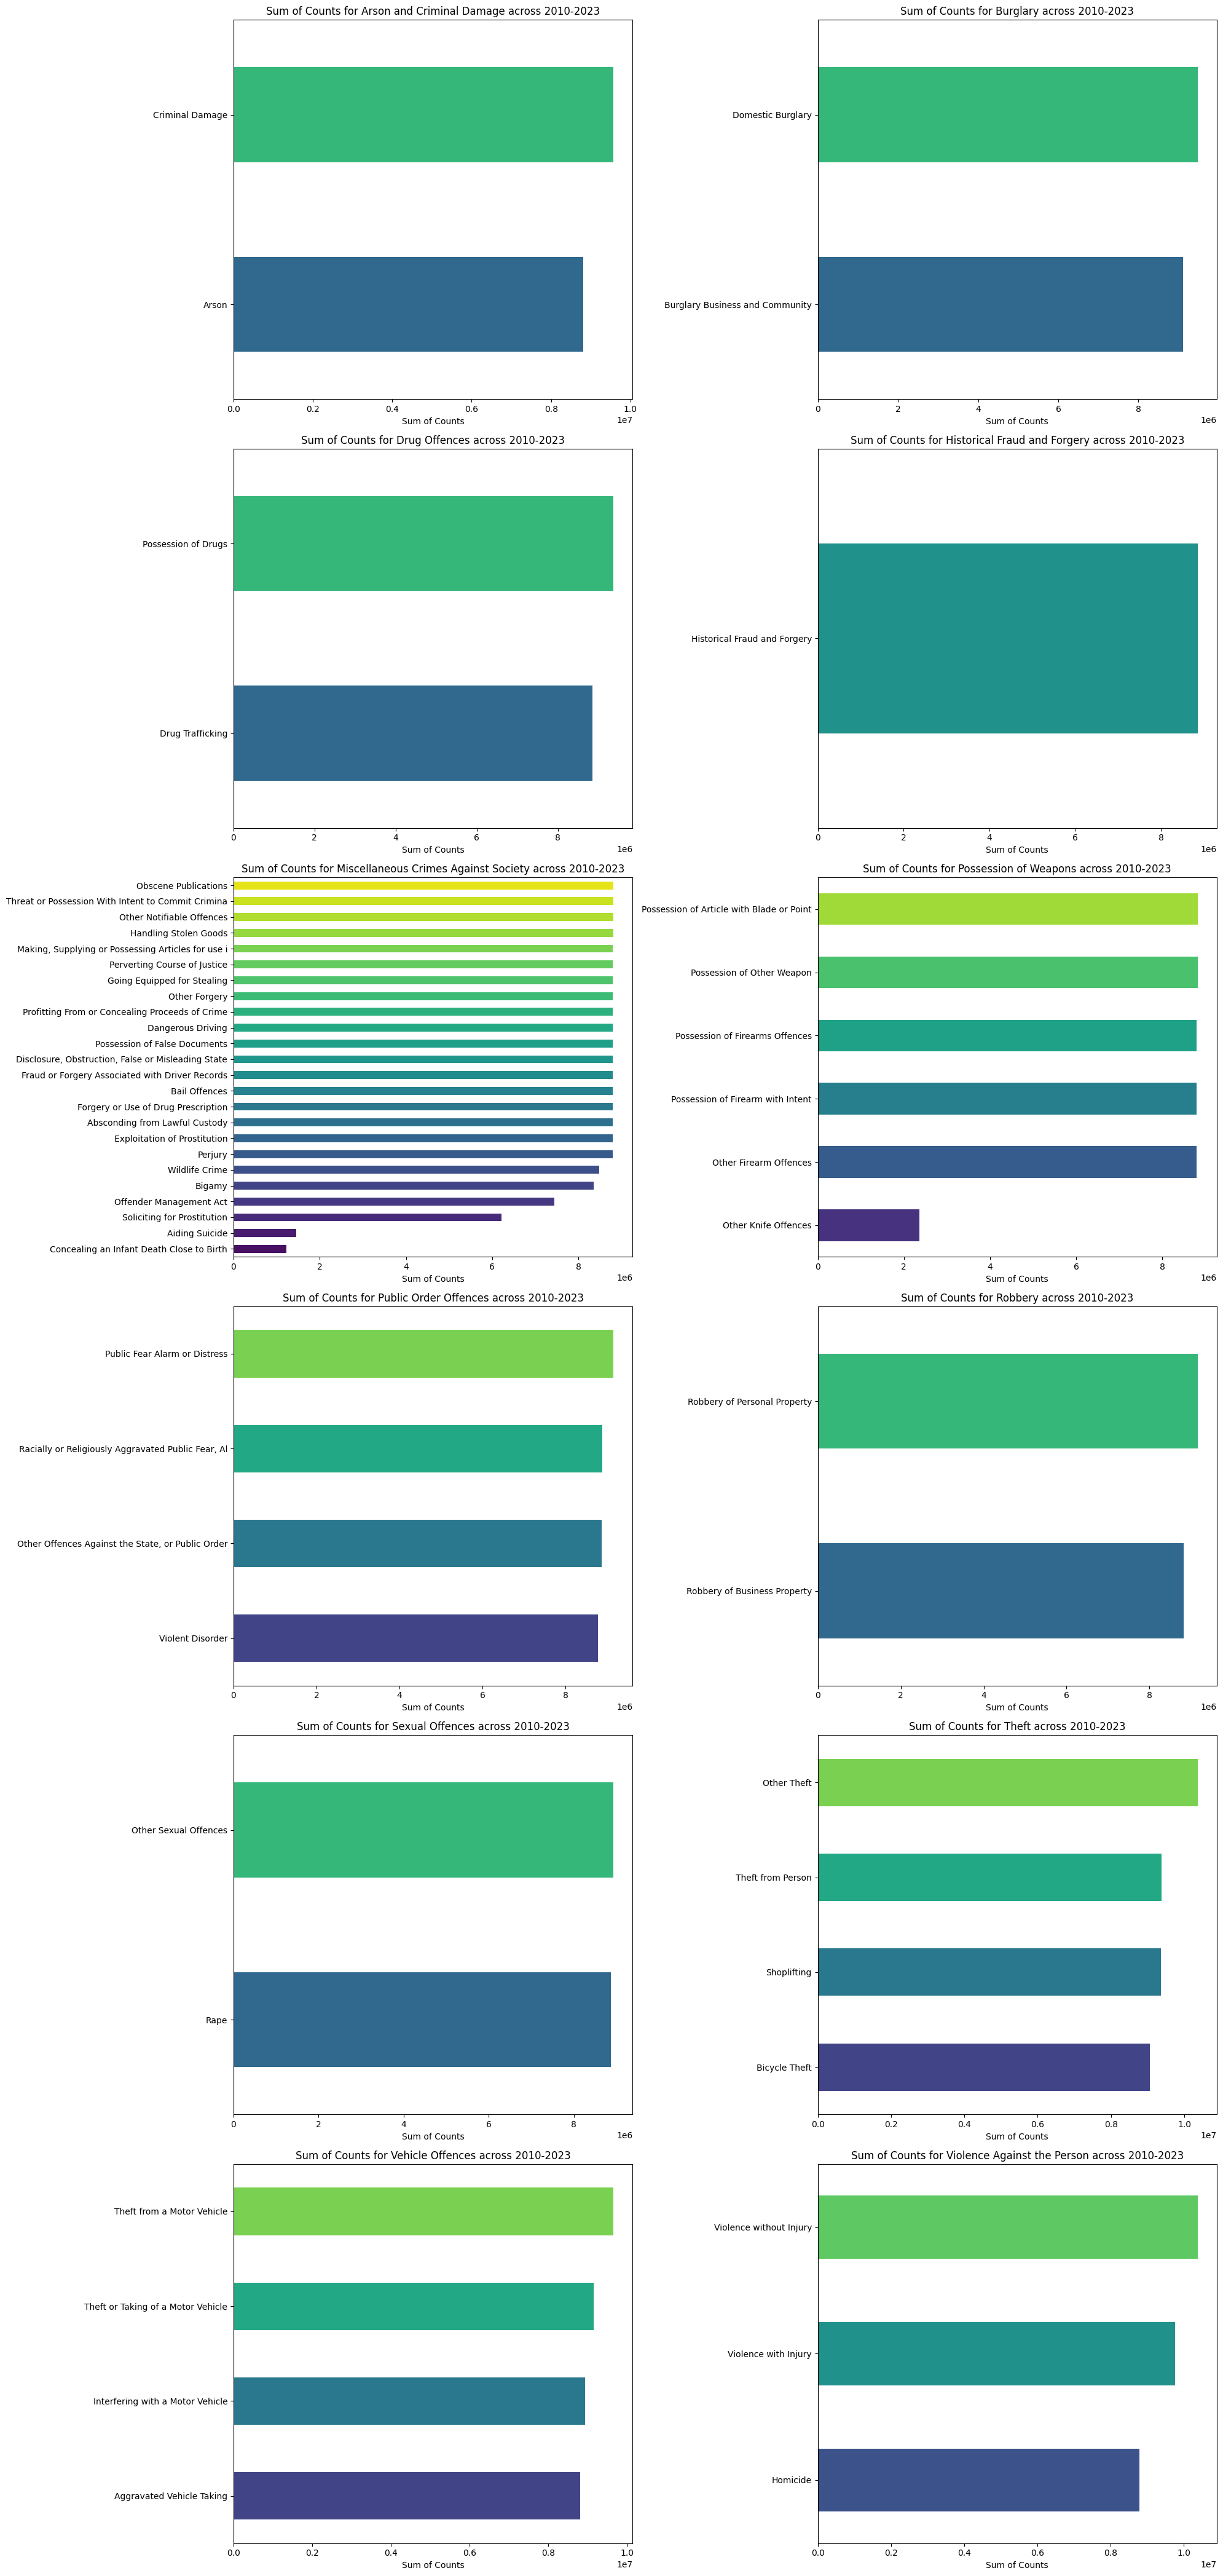

In [74]:
'''
Number of Major Categories, and there Minor Categories from 2010 to 2023
'''

# Getting unique major categories
major_categories = df['MajorText'].unique()

# Number of rows and columns for the subplot grid
n_rows = len(major_categories) // 2 + len(major_categories) % 2
n_cols = 2

# Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 7 * n_rows))

for i, category in enumerate(major_categories):
    # Filtering data for each major category
    major_cat = df[df['MajorText'] == category]

    # Grouping by minor category and summing
    grouped_data = major_cat.groupby(by='MinorText').sum().drop(columns = ['MajorText', 'LookUp_BoroughName'])

    # Plotting
    ax = axes[i // n_cols, i % n_cols]
    grouped_data.sum(axis=1).sort_values().plot(kind='barh', ax=ax, color=sns.color_palette("viridis", len(grouped_data)))
    ax.set_title(f'Sum of Counts for {category} across 2010-2023')
    ax.set_xlabel('Sum of Counts')
    ax.set_ylabel('')

plt.subplots_adjust()
plt.tight_layout()

plt.show()

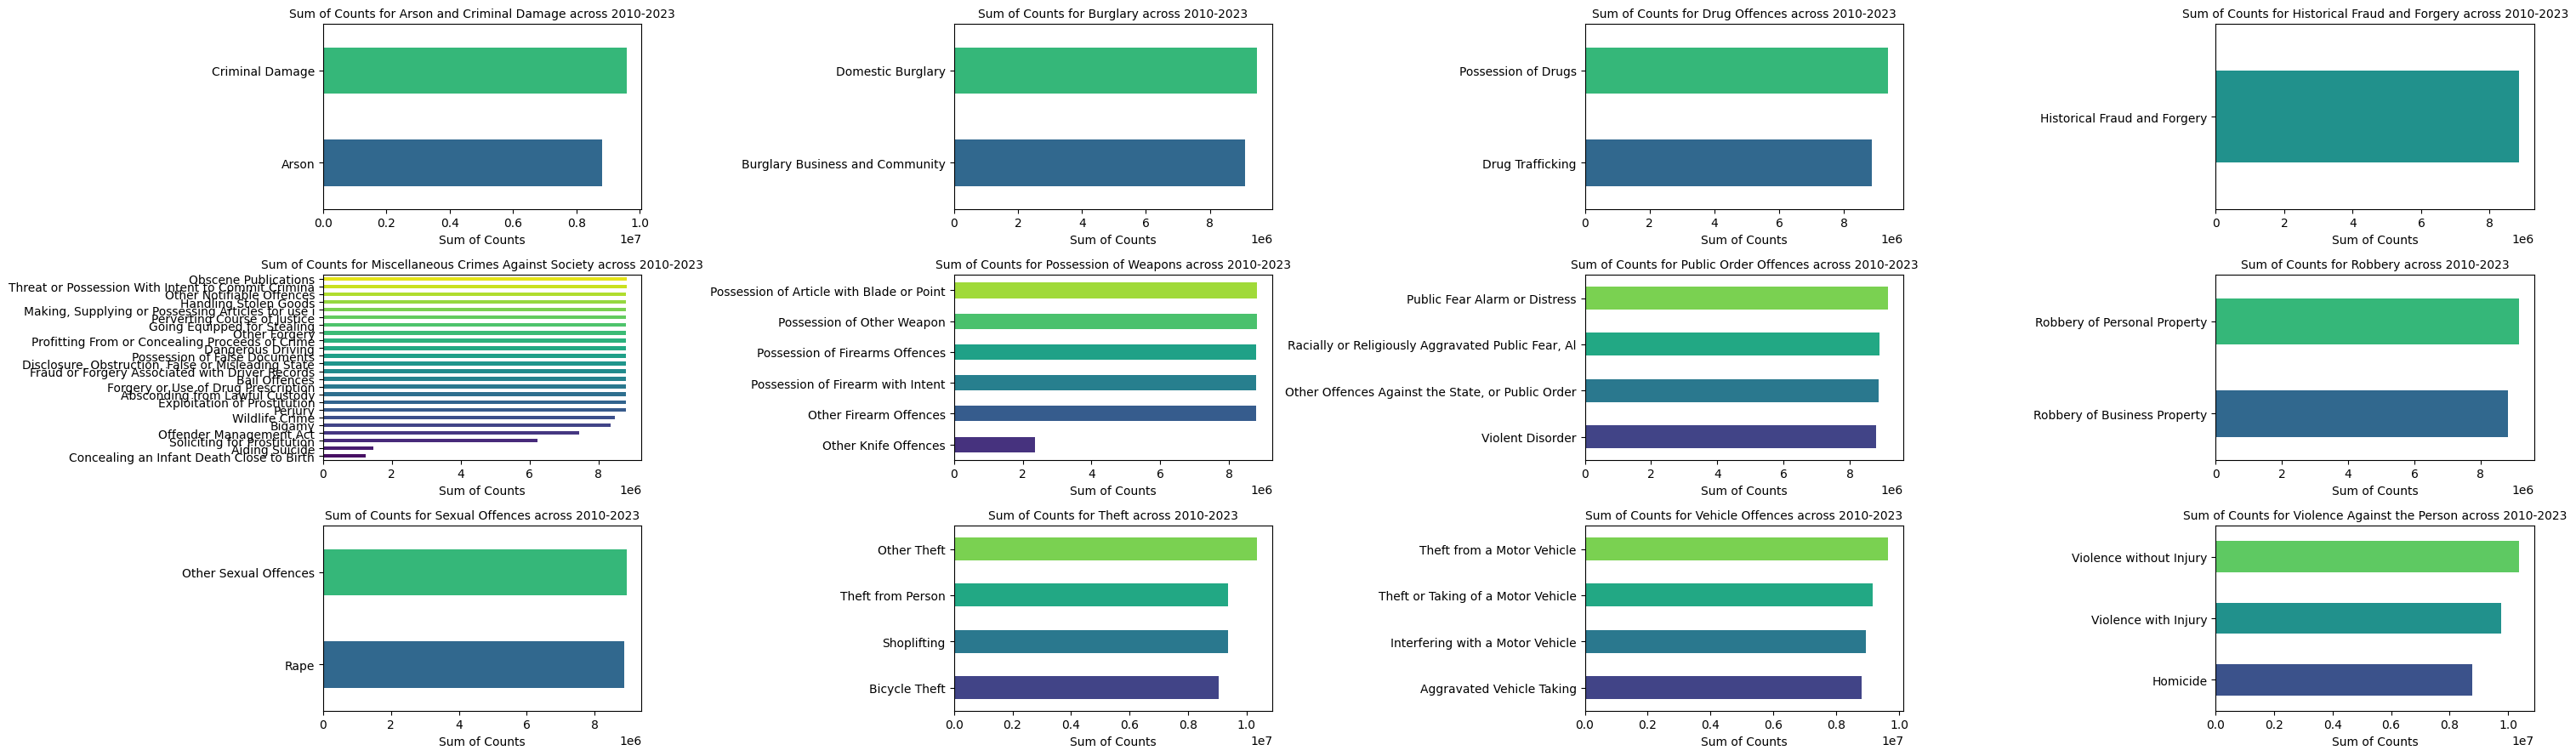

In [55]:
major_categories = df['MajorText'].unique()

n_cols = 4
n_rows = len(major_categories) // n_cols + len(major_categories) % n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 3 * n_rows))  # Adjust the figsize as needed

font_size = 10  

for i, category in enumerate(major_categories):
    # Filtering data for each major category
    major_cat = df[df['MajorText'] == category]

    # Grouping by minor category and summing
    grouped_data = major_cat.groupby(by='MinorText').sum().drop(columns=['MajorText', 'LookUp_BoroughName'])

    # Plotting
    ax = axes[i // n_cols, i % n_cols]
    grouped_data.sum(axis=1).sort_values().plot(kind='barh', ax=ax, color=sns.color_palette("viridis", len(grouped_data)))
    ax.set_title(f'Sum of Counts for {category} across 2010-2023', fontsize=font_size)
    ax.set_xlabel('Sum of Counts', fontsize=font_size)
    ax.tick_params(labelsize=font_size)
    ax.set_ylabel('')

plt.subplots_adjust(hspace=0.5, wspace=0.3)  
plt.tight_layout()

plt.show()


#  Timeseries analysis

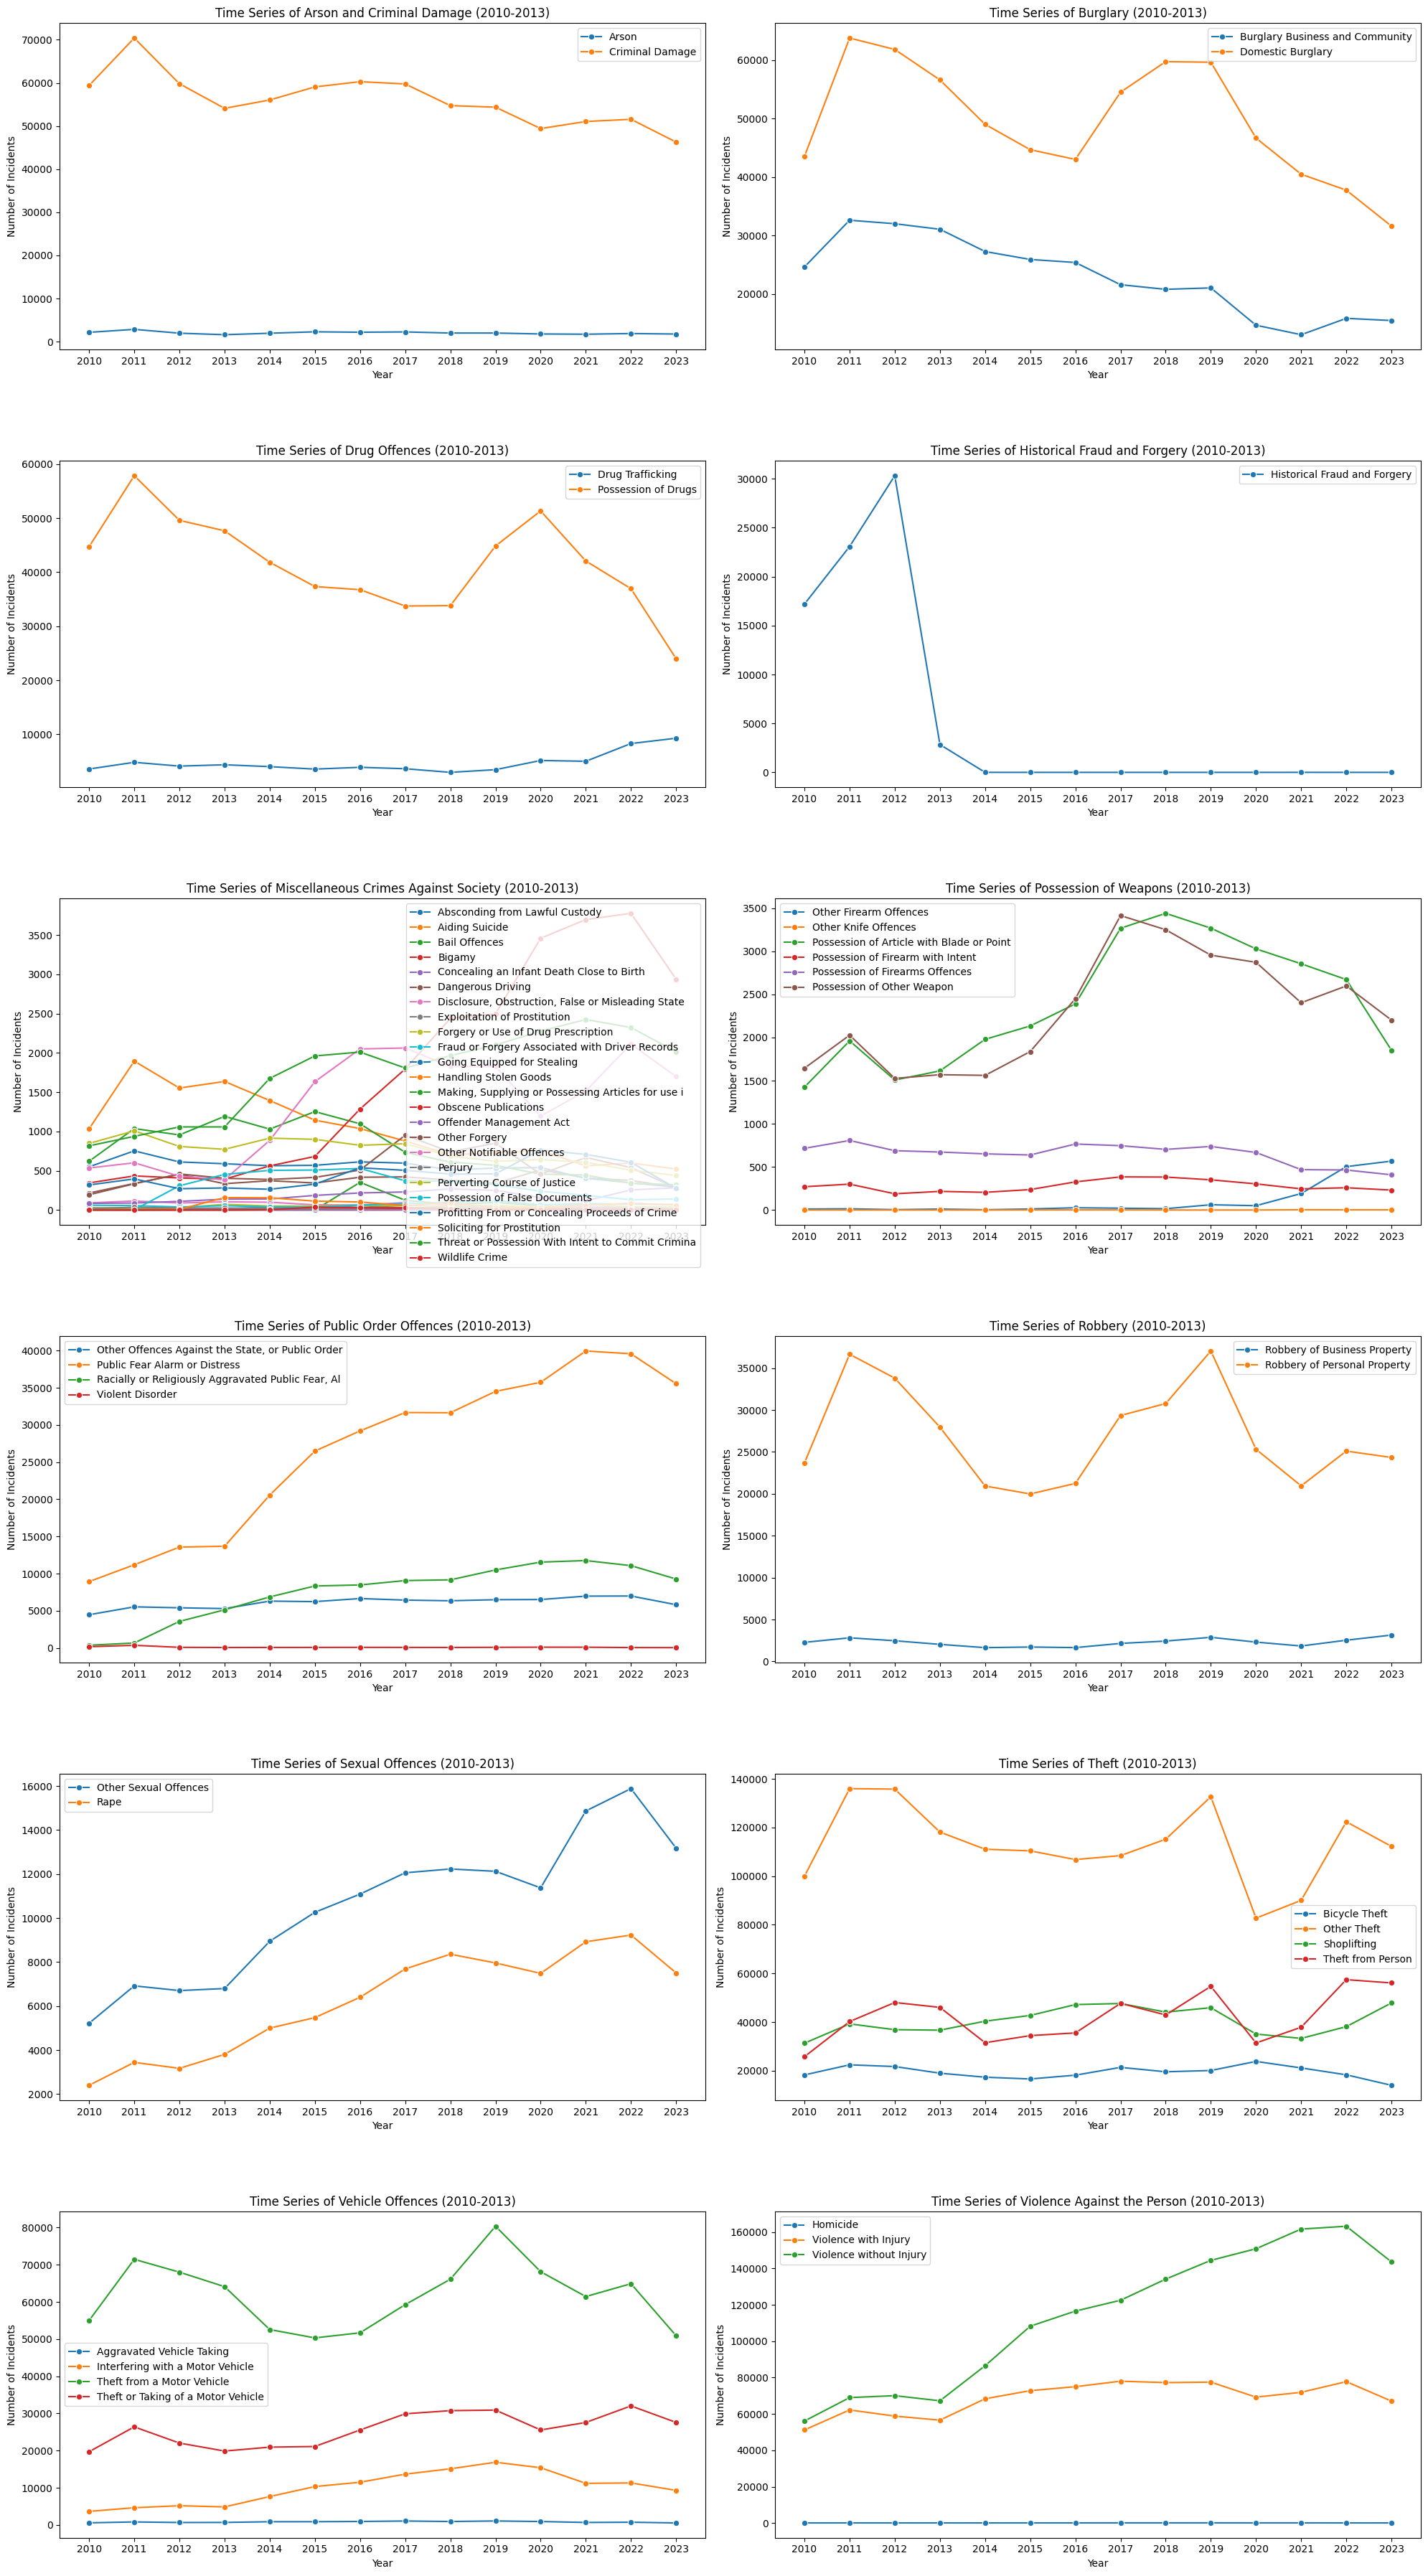

In [94]:
# Timeseries of each Major Category. What are trends of each major category like?
grouped = df.groupby(by=['MajorText', 'MinorText']).agg('sum')
grouped.head()

grouped_yearly = aggregate_to_yearly(grouped)
#grouped_yearly = grouped_yearly.transpose()

major_cat = df['MajorText'].unique()

# Assuming 'major_cat' contains unique major categories and 'grouped_yearly' is your DataFrame
n_categories = len(major_cat)

# Determine the number of rows needed for the grid
n_rows = n_categories // 2 + n_categories % 2
n_cols = 2

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing
grouped_yearly.drop(['LookUp_BoroughName', 'population', 'poverty_Rate'], axis = 1, inplace = True)
# Loop through each major category
for i, category in enumerate(major_cat):
    # Retrieve data for the current category
    data = grouped_yearly.loc[category].transpose()

    # Plotting each column in the current subplot
    for column in data.columns:
        sns.lineplot(x=data.index, y=data[column], ax=axes[i], marker='o', label=column)

    # Customizing the subplot
    axes[i].set_title(f'Time Series of {category} (2010-2013)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Incidents')
    axes[i].set_xticks(data.index)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

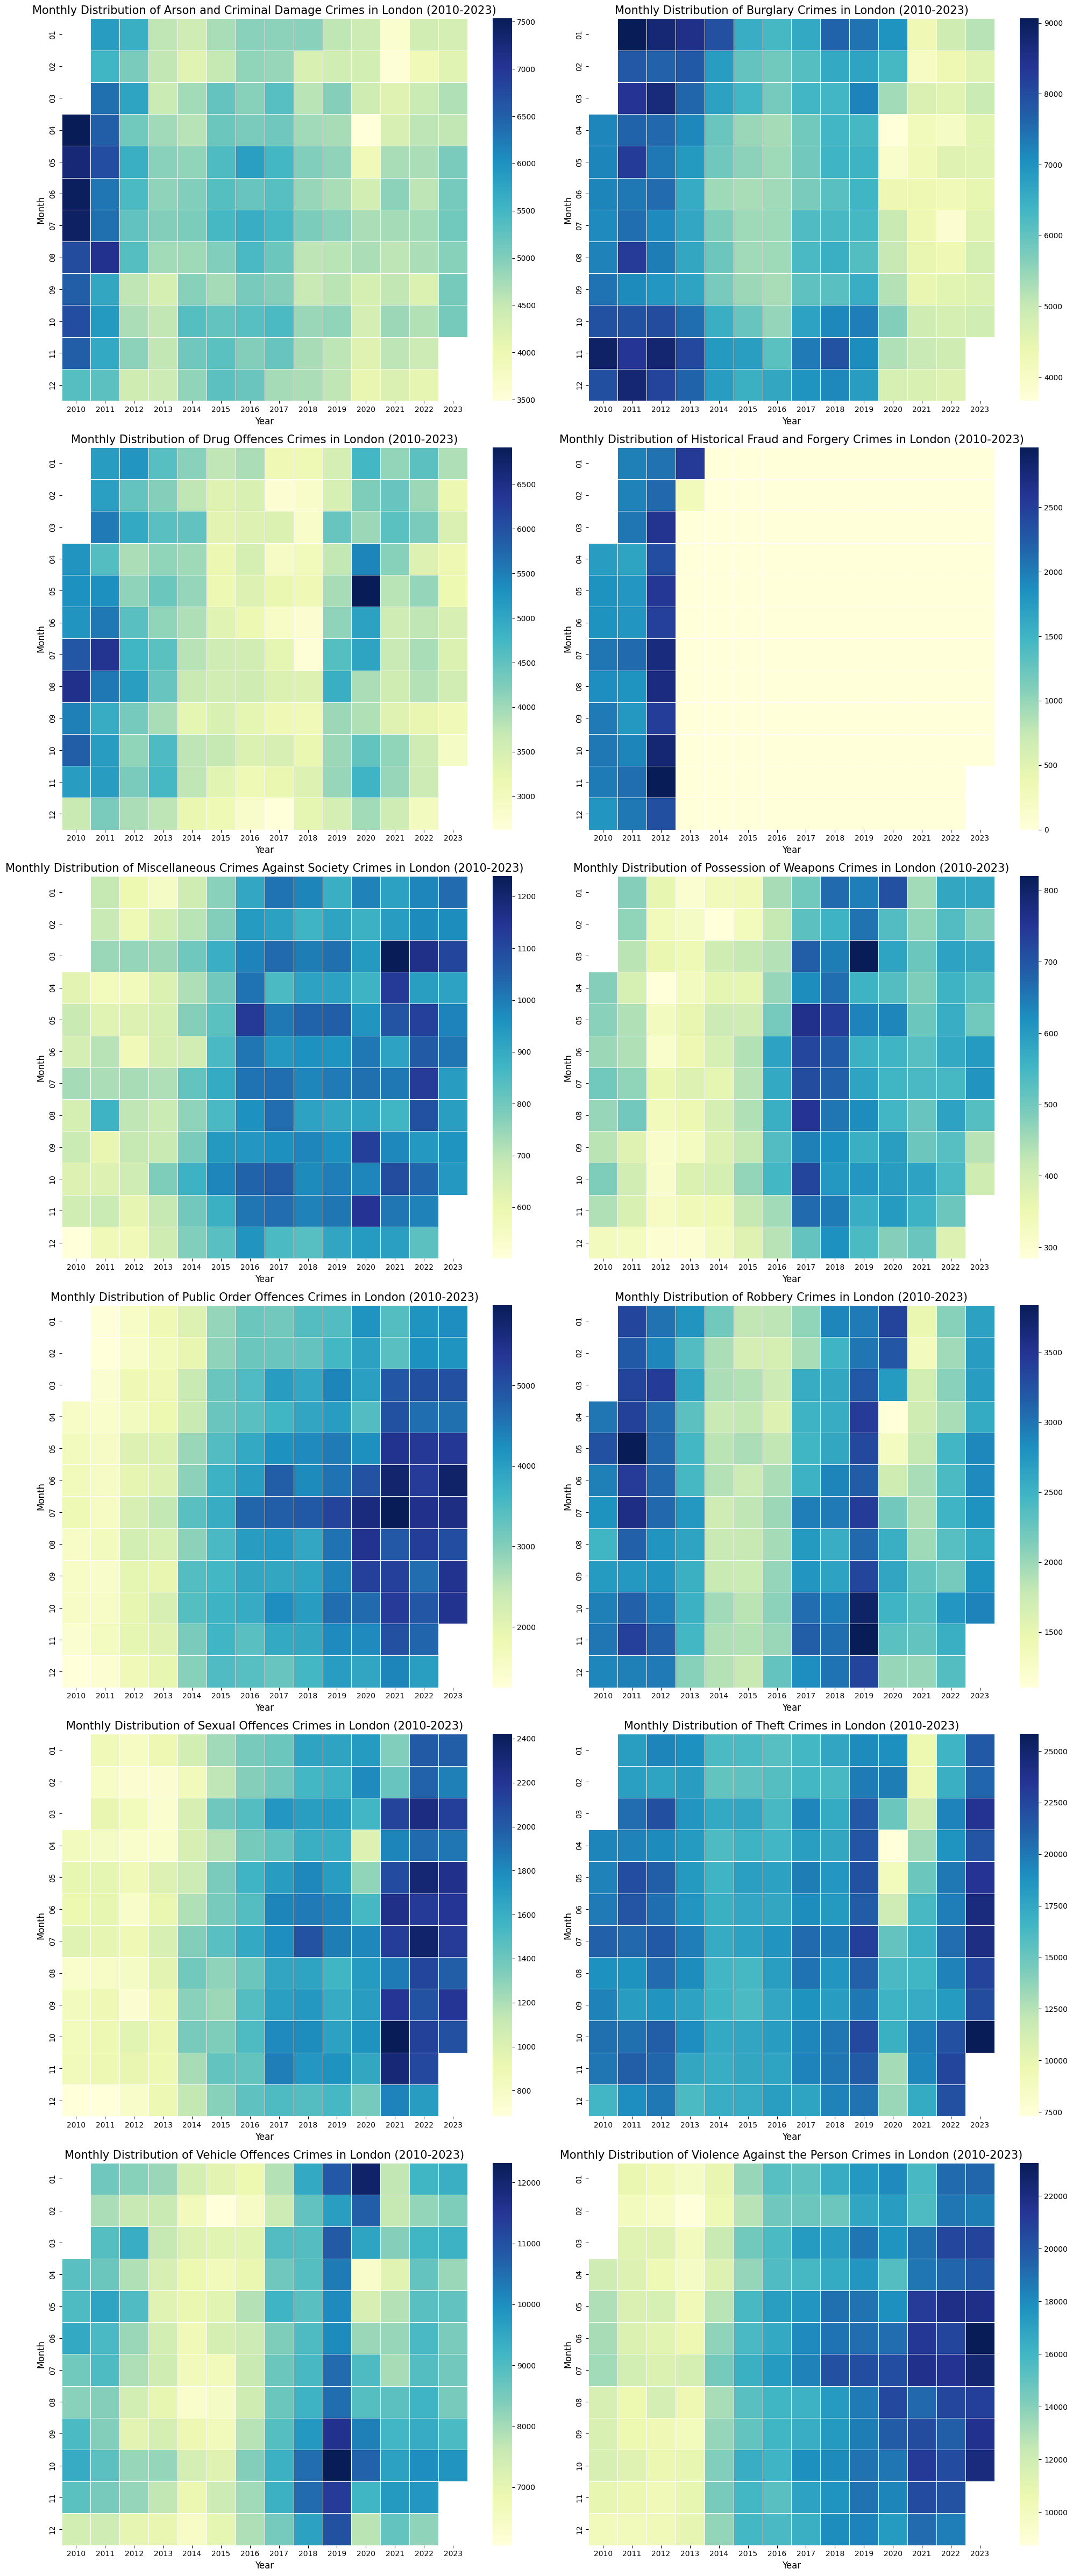

In [114]:
# Determine the number of rows needed for the grid
n_categories = len(major_cat)
n_rows = n_categories // 2 + n_categories % 2
n_cols = 2

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each major category
for i, cat in enumerate(major_cat):
    # Filter data for the current category
    filted_data = df[df['MajorText'] == cat]
    grouped = filted_data.groupby(by=['LookUp_BoroughName']).agg('sum').sum()
    grouped.drop(['MajorText', 'MinorText', 'population', 'poverty_Rate'], axis = 0, inplace = True)
    grouped_df = pd.DataFrame(grouped).reset_index()
    grouped_df['Year'] = grouped_df['index'].str[:4]
    grouped_df['Month'] = grouped_df['index'].str[4:] 
    monthly_pivot = grouped_df.pivot(index = "Month", columns="Year", values=0)
    monthly_pivot = monthly_pivot.astype(float)
    # Plotting heatmap in the current subplot
    sns.heatmap(monthly_pivot, cmap="YlGnBu", linewidths=.5, ax=axes[i])
    axes[i].set_title(f'Monthly Distribution of {cat} Crimes in London (2010-2023)', fontsize=15)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('Month', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Counts per Borough

When looking at spatial plots we use crime rate per 1000 people.

In [134]:
a = pd.merge(pd.DataFrame(total_by_borough), population_df, on=['LookUp_BoroughName'], how = 'outer').fillna(0)
a['average_yearly_crime_rate_per_1000'] = 1000 * (a[0]/a['population'])/14
a[a['LookUp_BoroughName']!='London Heathrow and London City Airports']


LookUp_BoroughName         0  population  \
0              Westminster  119559.0    205087.0   
1                  Croydon  117096.0    390506.0   
2                   Newham  110012.0    350626.0   
3                  Lambeth  109942.0    317498.0   
4                   Ealing  105827.0    366127.0   
5            Tower Hamlets  103660.0    312273.0   
6                    Brent  103543.0    338918.0   
7                Southwark  101618.0    306374.0   
8                 Lewisham   97165.0    299810.0   
9                Greenwich   94697.0    289254.0   
10                 Hackney   92930.0    259956.0   
11                Haringey   88369.0    264130.0   
12                 Enfield   87799.0    329601.0   
13                Hounslow   87404.0    287940.0   
14              Hillingdon   85333.0    304792.0   
15                  Barnet   80601.0    388639.0   
16                  Camden   78988.0    210390.0   
17          Waltham Forest   78388.0    278050.0   
18               Islington   77782.0    216767.0   
19              Wandsworth   77034.0    328367.0   
20               Redbridge   74649.0    309836.0   
21                 Bromley   73096.0    329830.0   
22    Barking and Dagenham   72165.0    218534.0   
23  Hammersmith and Fulham   62315.0    183295.0   
24                Havering   61852.0    262022.0   
25                  Bexley   54573.0    246543.0   
26                  Harrow   52723.0    260987.0   
27  Kensington and Chelsea   47247.0    143940.0   
28                  Merton   45044.0    215324.0   
29                  Sutton   44872.0    209517.0   
30    Kingston upon Thames   37574.0    167845.0   
31    Richmond upon Thames   32969.0    195232.0   

    average_yearly_crime_rate_per_1000  
0                            41.640516  
1                            21.418365  
2                            22.411344  
3                            24.734014  
4                            20.646037  
5                            23.710938  
6                            21.822177  
7                            23.691399  
8                            23.149185  
9                            23.384539  
10                           25.534541  
11                           23.897594  
12                           19.027118  
13                           21.682096  
14                           19.997947  
15                           14.813784  
16                           26.816864  
17                           20.137180  
18                           25.630549  
19                           16.756947  
20                           17.209335  
21                           15.829800  
22                           23.587372  
23                           24.283649  
24                           16.861180  
25                           15.810919  
26                           14.429564  
27                           23.445781  
28                           14.942266  
29                           15.297770  
30                           15.990093  
31                           12.062206

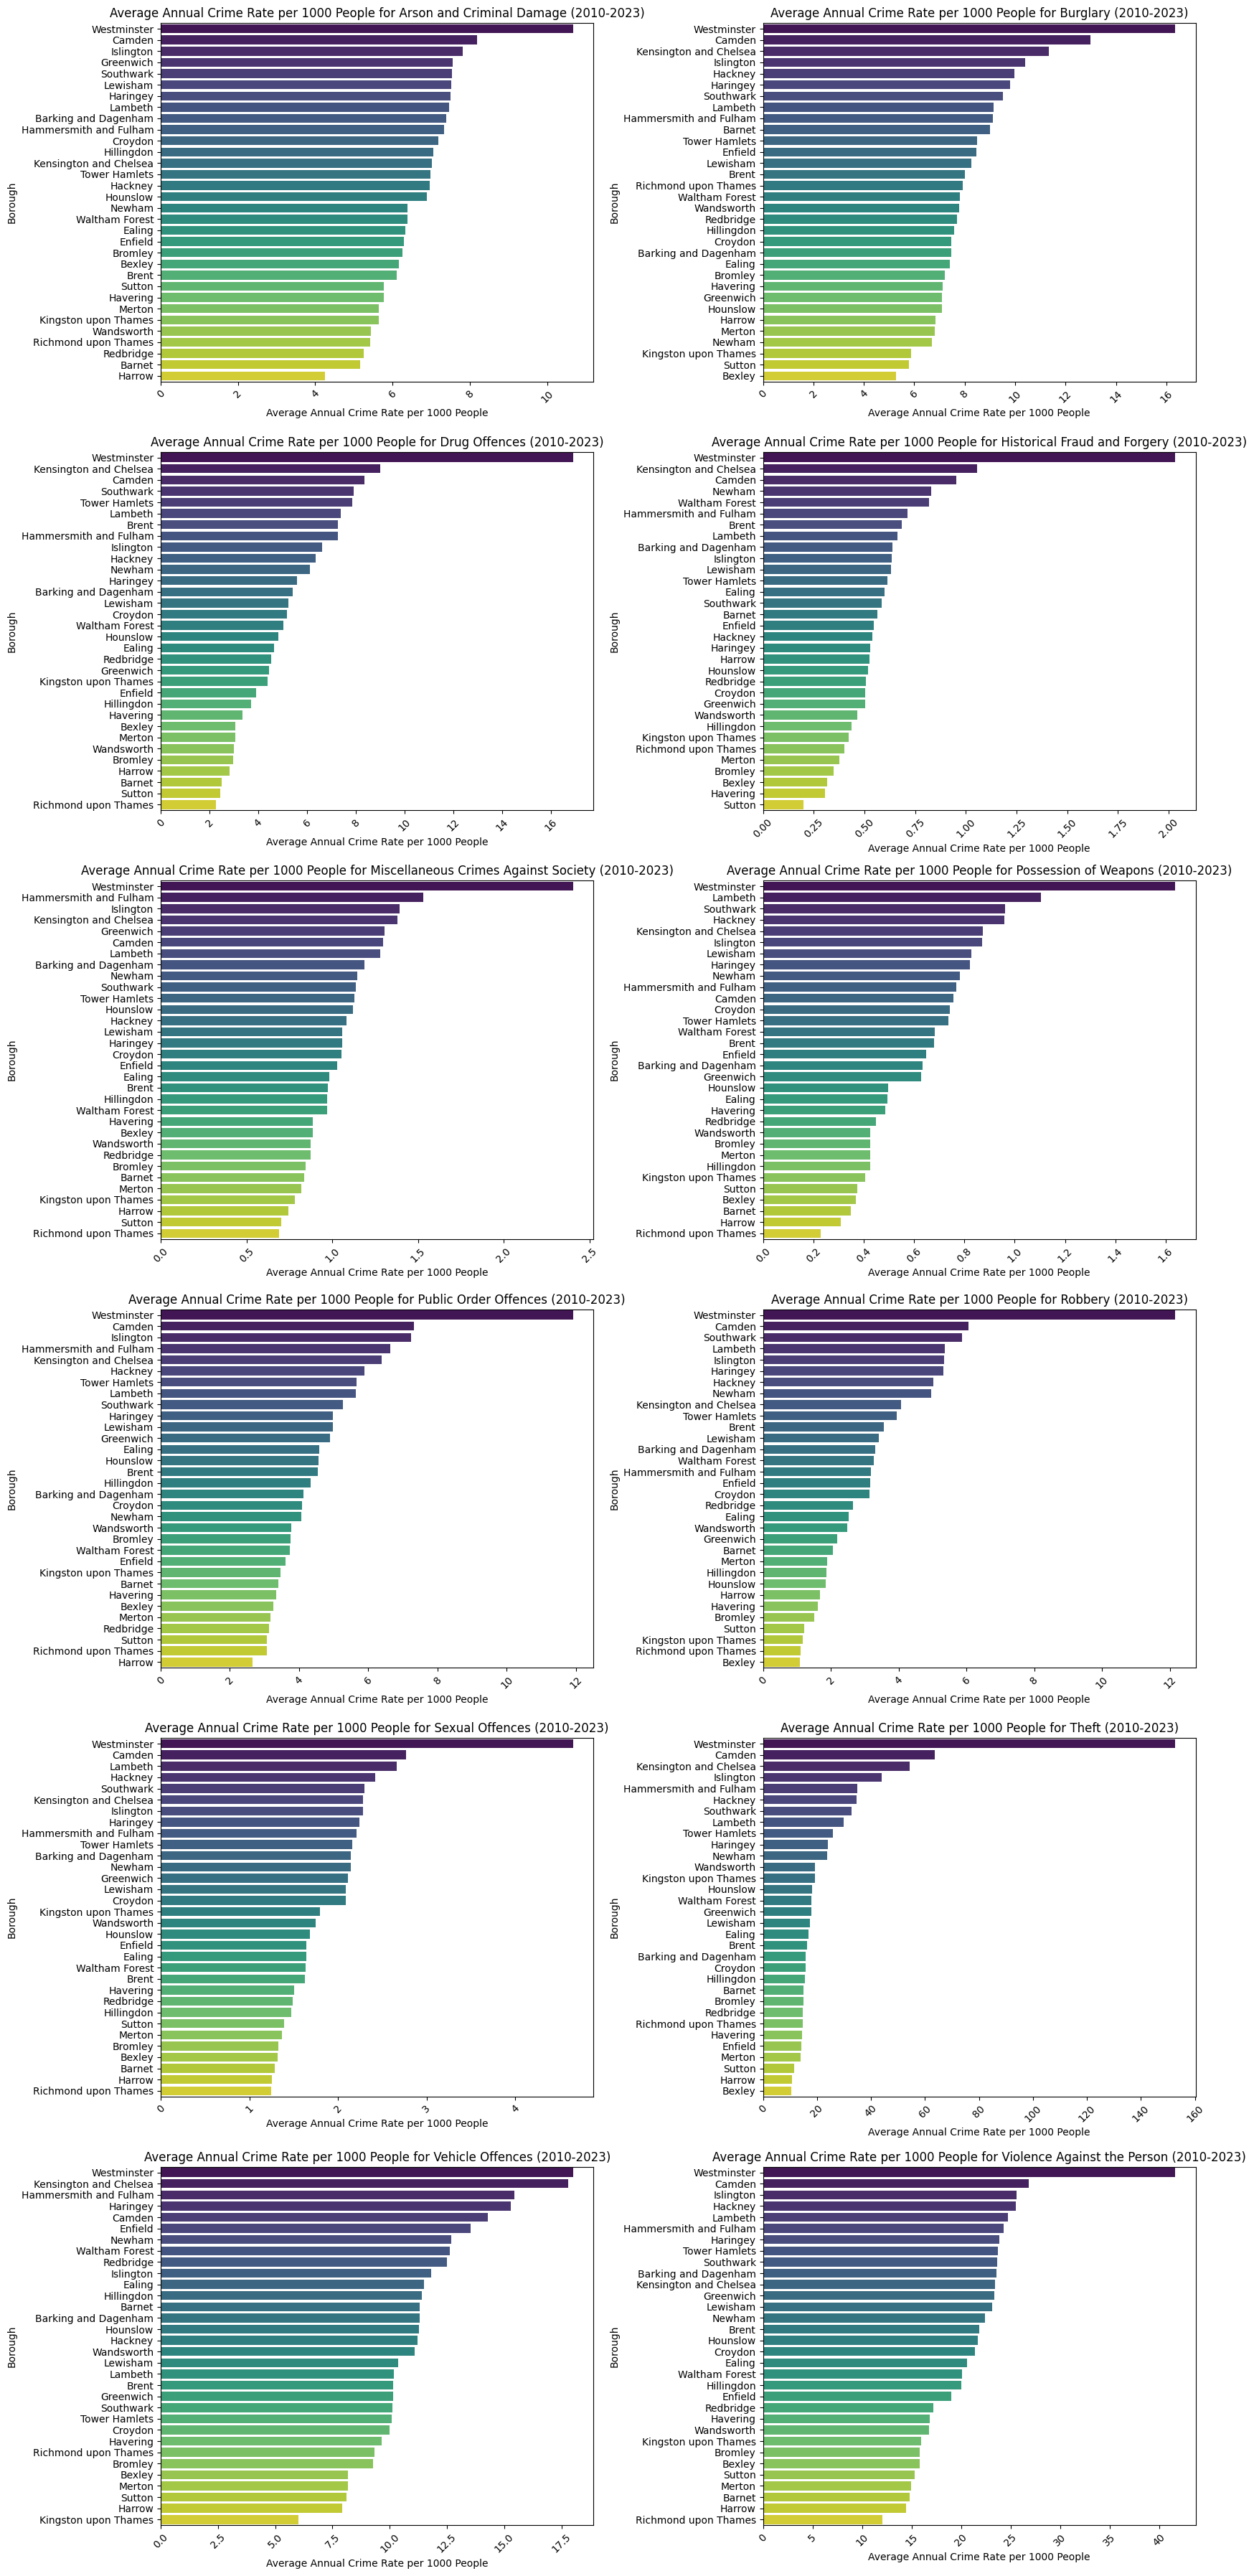

In [140]:
# Extracting the unique major categories
major_categories = df['MajorText'].unique()

# Setting up the figure for the grid of plots
fig, axes = plt.subplots(nrows=(len(major_categories) + 1) // 2, ncols=2, figsize=(17, 6 * len(major_categories) // 2))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Looping through each major category to plot
for i, category in enumerate(major_categories):
    # Filtering data for the current category
    filtered_data = yearly_df[yearly_df['MajorText'] == category].copy()
    total_by_borough = filtered_data.drop(columns = ['MajorText', 'MinorText', 'population', 'poverty_Rate']).groupby('LookUp_BoroughName').sum().sum(axis=1).sort_values(ascending=False)
    total_by_borough = pd.merge(pd.DataFrame(total_by_borough), population_df, on=['LookUp_BoroughName'], how = 'outer').fillna(0)
    total_by_borough['average_yearly_crime_rate_per_1000'] = 1000 * (total_by_borough[0]/total_by_borough['population'])/14
    total_by_borough = total_by_borough[total_by_borough['LookUp_BoroughName']!='London Heathrow and London City Airports']
    total_by_borough.sort_values(by='average_yearly_crime_rate_per_1000', ascending=False, inplace = True)

    # Getting crime per 1000 people
    # Determining the position of the current plot
    row = i // 2
    col = i % 2

    # Creating the barplot
    sns.barplot(y=total_by_borough['LookUp_BoroughName'], x=total_by_borough['average_yearly_crime_rate_per_1000'], hue = total_by_borough['LookUp_BoroughName'], legend = False, palette="viridis", ax=axes[row, col])
    axes[row, col].set_title(f'Average Annual Crime Rate per 1000 People for {category} (2010-2023)', fontsize=12)
    axes[row, col].set_xlabel('Average Annual Crime Rate per 1000 People', fontsize=10)
    axes[row, col].set_ylabel('Borough', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [141]:
# Merging shapefiles
def merge_shape_with_data(shapefile : gpd.GeoDataFrame, df : pd.DataFrame, index_in_shapefle : str = 'NAME',index_in_data : str = 'Borough'):
    '''
    For borough dataset: index_in_shapefile = 'NAME' and index_in_data = 'Borough'
    For lsoa dataset : index_in_shapefile = 'LSOA11NM; and index_in_data = 'LSOA Name'
    '''
    
    grouped = df.groupby(by = index_in_data).agg('sum')

    merged = shapefile.set_index(index_in_shapefle).join(grouped)

    return merged

In [142]:
def plot_yearly_heatmap(df_shapefile, year, cutpoints=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    if cutpoints is not None:
        df_shapefile.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,scheme='user_defined', classification_kwds={'bins':cutpoints})
    else:
        df_shapefile.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    ax.set_title(f'Crimes in London Boroughs - {year}', fontsize=15)
    plt.axis('off')
    plt.show()

In [143]:
def plot_yearly_heatmaps_on_grid(df_shapefile, start_year, end_year, cutpoints=None, crime = None):
    # Number of years to plot
    num_years = end_year - start_year + 1

    # Create the figure with 6 columns and 2 rows
    fig, axes = plt.subplots(2, 6, figsize=(30, 10))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Iterate over each year and plot
    for i, year in enumerate(range(start_year, end_year + 1)):
        ax = axes[i]
        year_str = str(year)

        # Plotting for each year
        if cutpoints is not None:
            df_shapefile.plot(column=year_str, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, scheme='user_defined', classification_kwds={'bins':cutpoints})
        else:
            df_shapefile.plot(column=year_str, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

        # Set title for each subplot
        ax.set_title(f'{crime}\n in London Boroughs - {year}', fontsize=12)
        ax.axis('off')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

# Spatial Temporal Plots per Major Category

In [145]:
# Loading shapefiles for Borough and LSOA
shapefile_borough = gpd.read_file("statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
shapefile_lose = gpd.read_file("statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp")

In [158]:
shapefile_borough = shapefile_borough[shapefile_borough['NAME']!= 'City of London']

In [204]:
population_df

LookUp_BoroughName  population
0                   Camden      210390
1                  Hackney      259956
2   Hammersmith and Fulham      183295
3                 Haringey      264130
4                Islington      216767
5   Kensington and Chelsea      143940
6                  Lambeth      317498
7                 Lewisham      299810
8                   Newham      350626
9                Southwark      306374
10           Tower Hamlets      312273
11              Wandsworth      328367
12             Westminster      205087
13    Barking and Dagenham      218534
14                  Barnet      388639
15                  Bexley      246543
16                   Brent      338918
17                 Bromley      329830
18                 Croydon      390506
19                  Ealing      366127
20                 Enfield      329601
21               Greenwich      289254
22                  Harrow      260987
23                Havering      262022
24              Hillingdon      304792
25                Hounslow      287940
26    Kingston upon Thames      167845
27                  Merton      215324
28               Redbridge      309836
29    Richmond upon Thames      195232
30                  Sutton      209517
31          Waltham Forest      278050

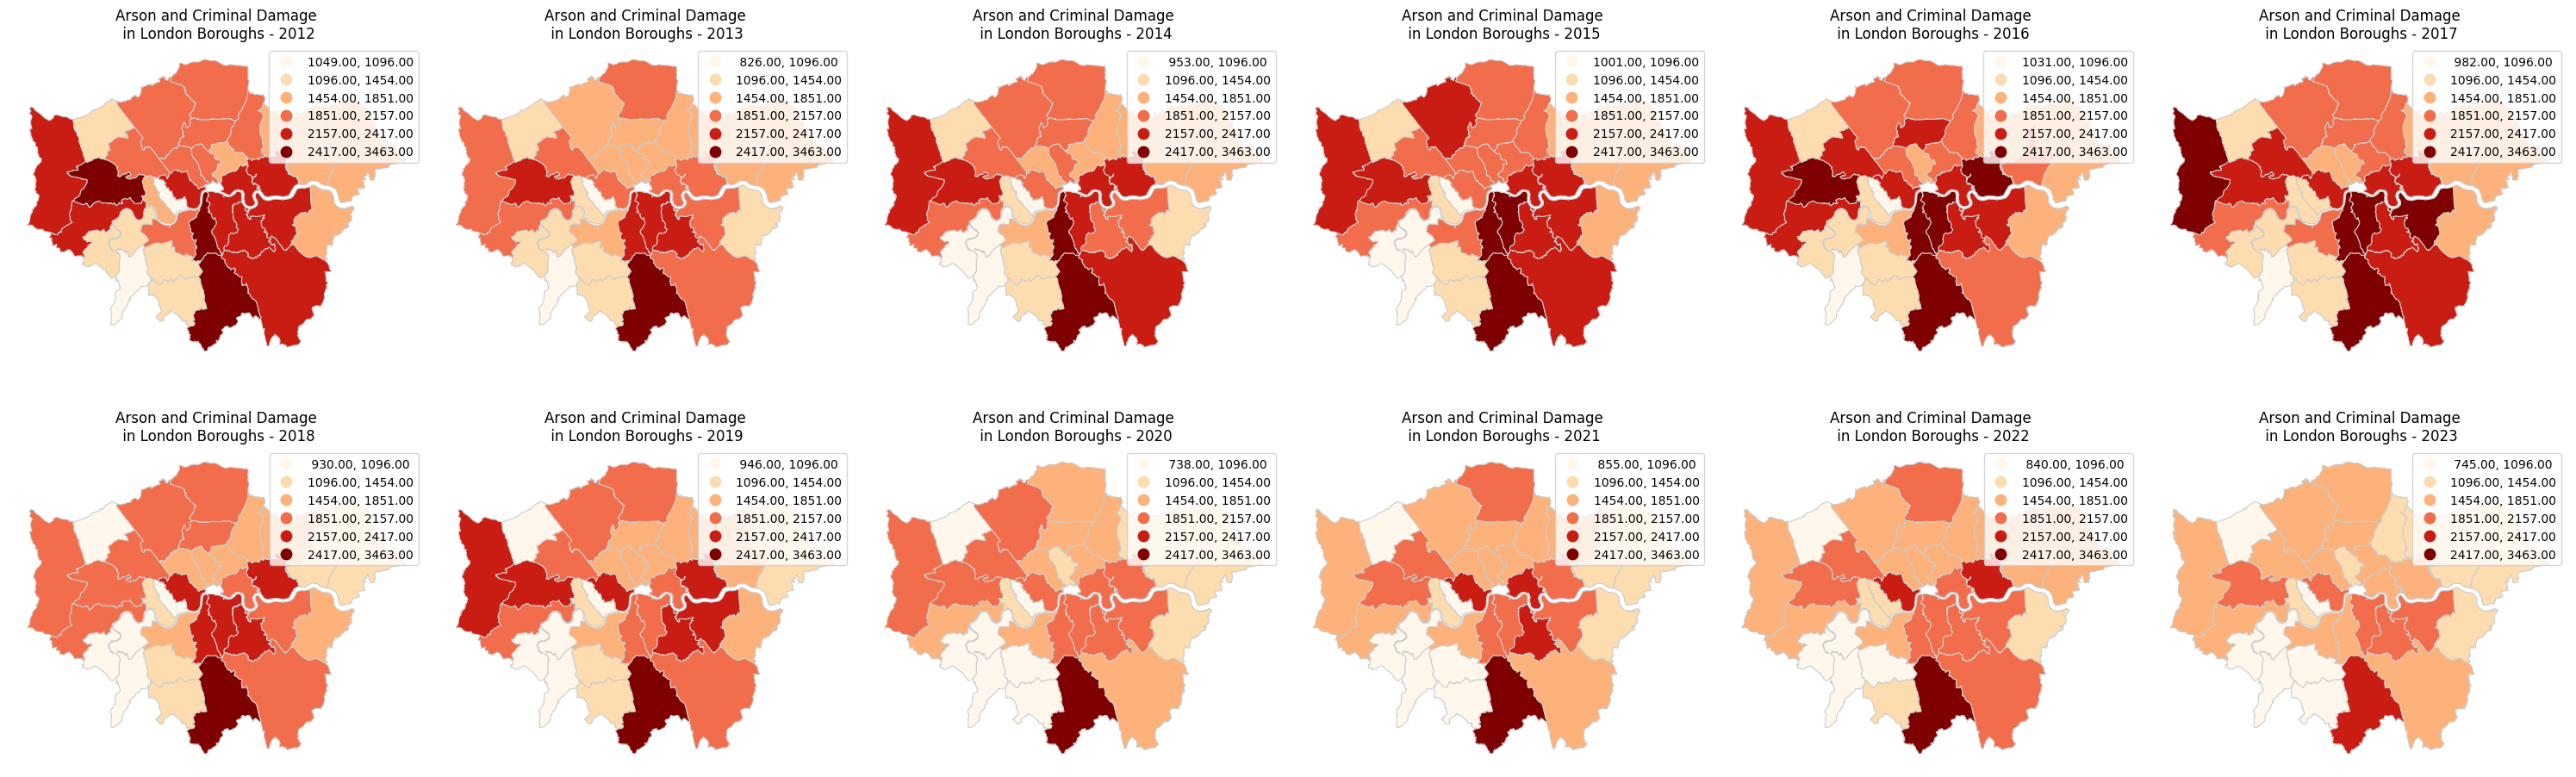

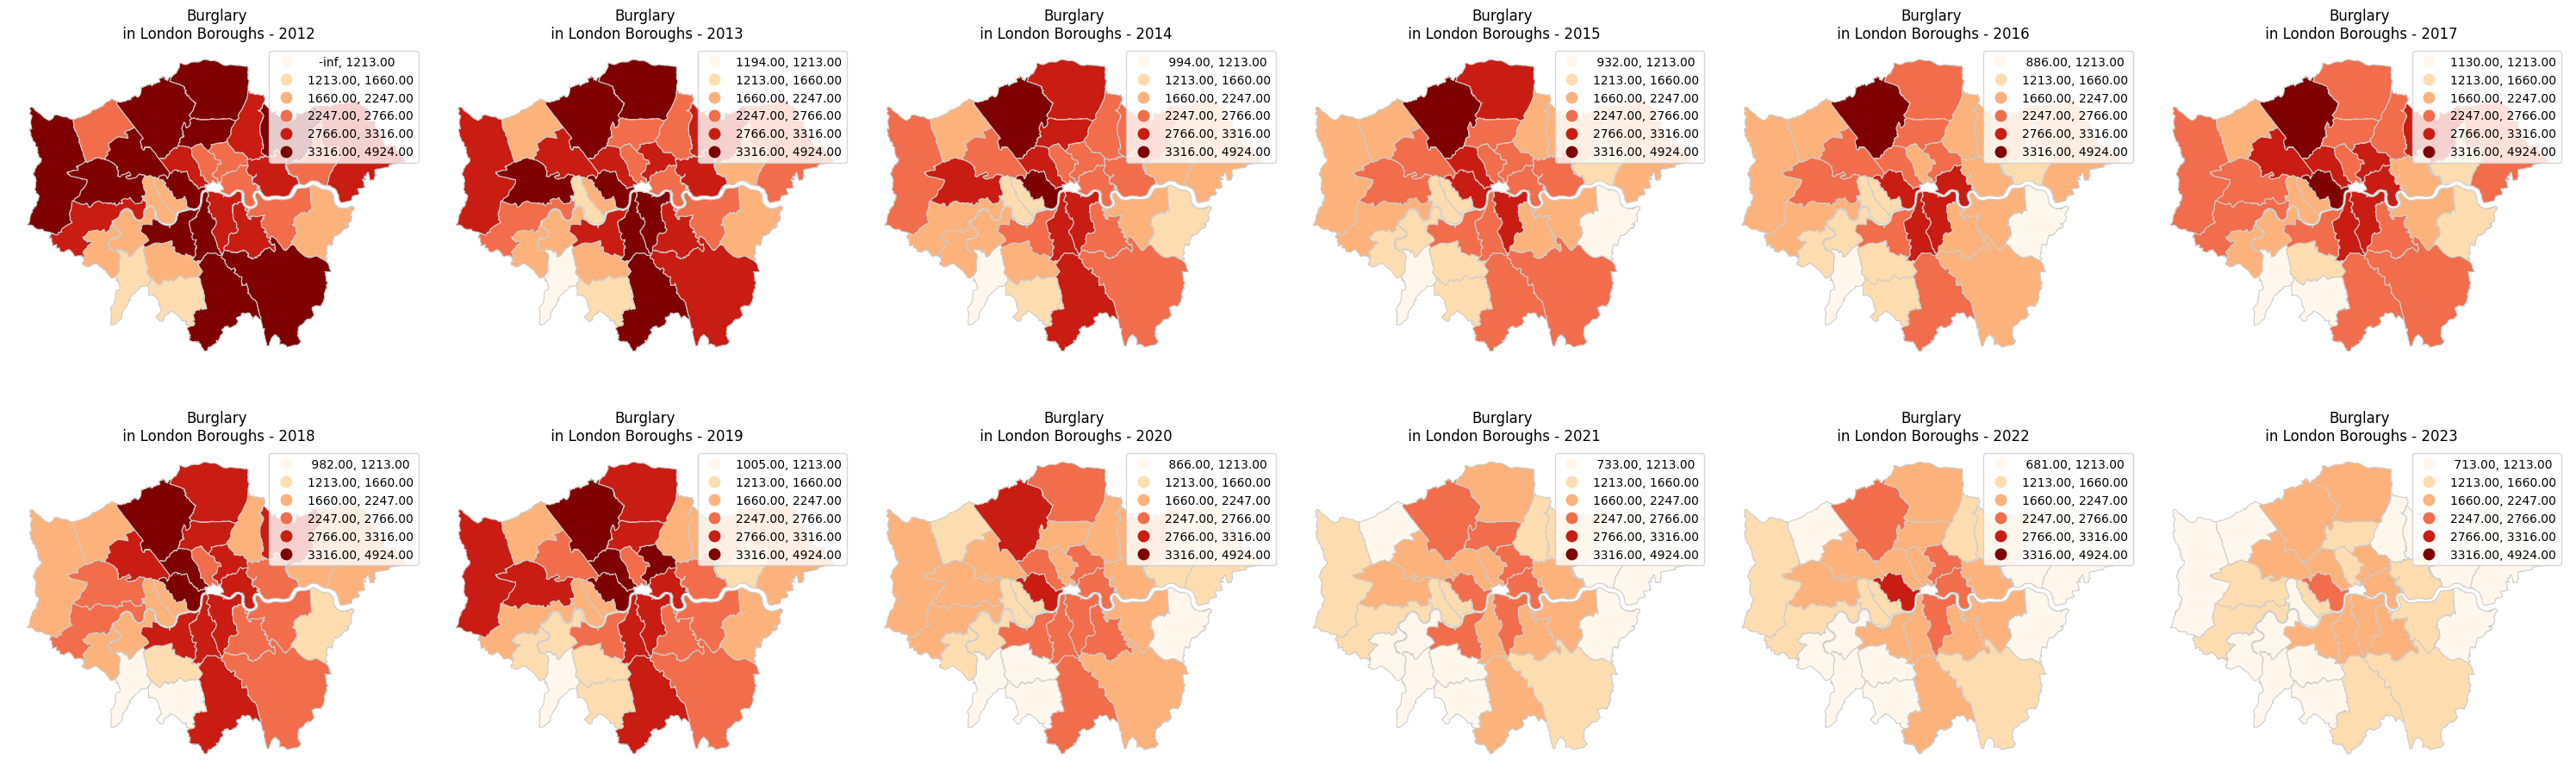

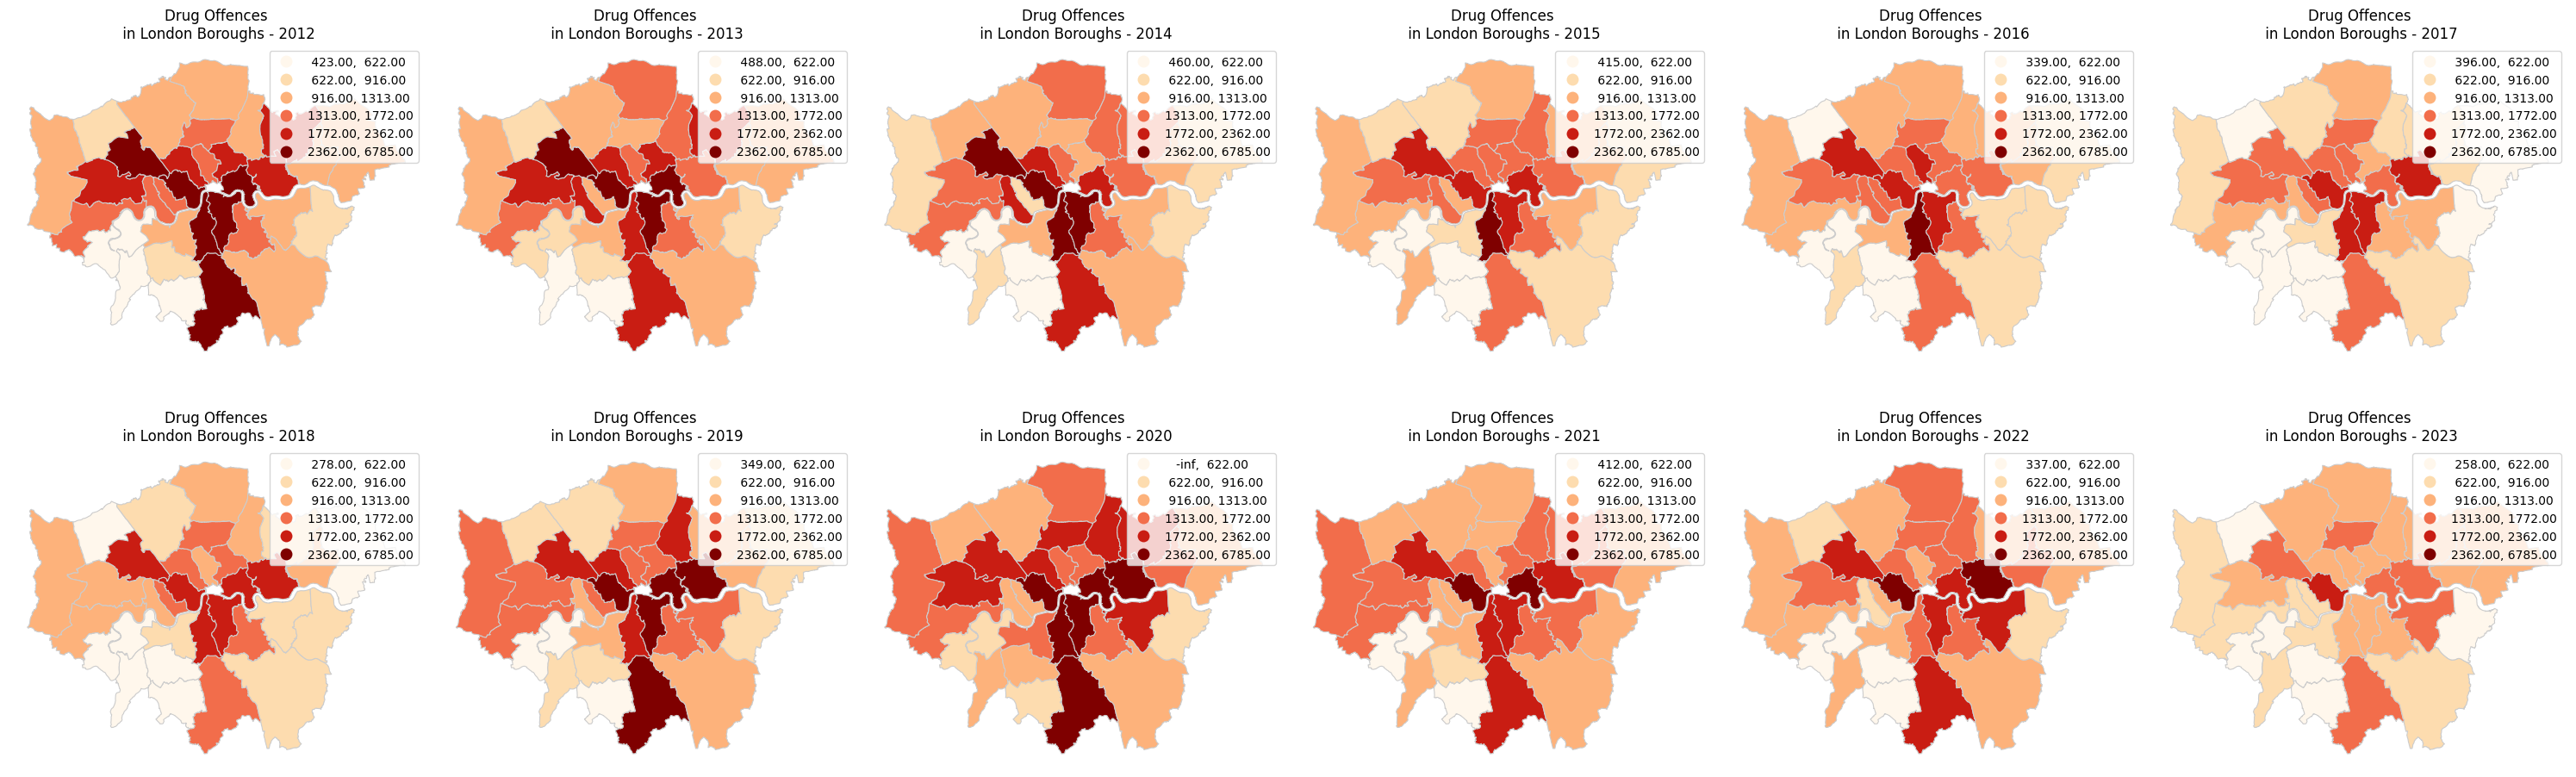

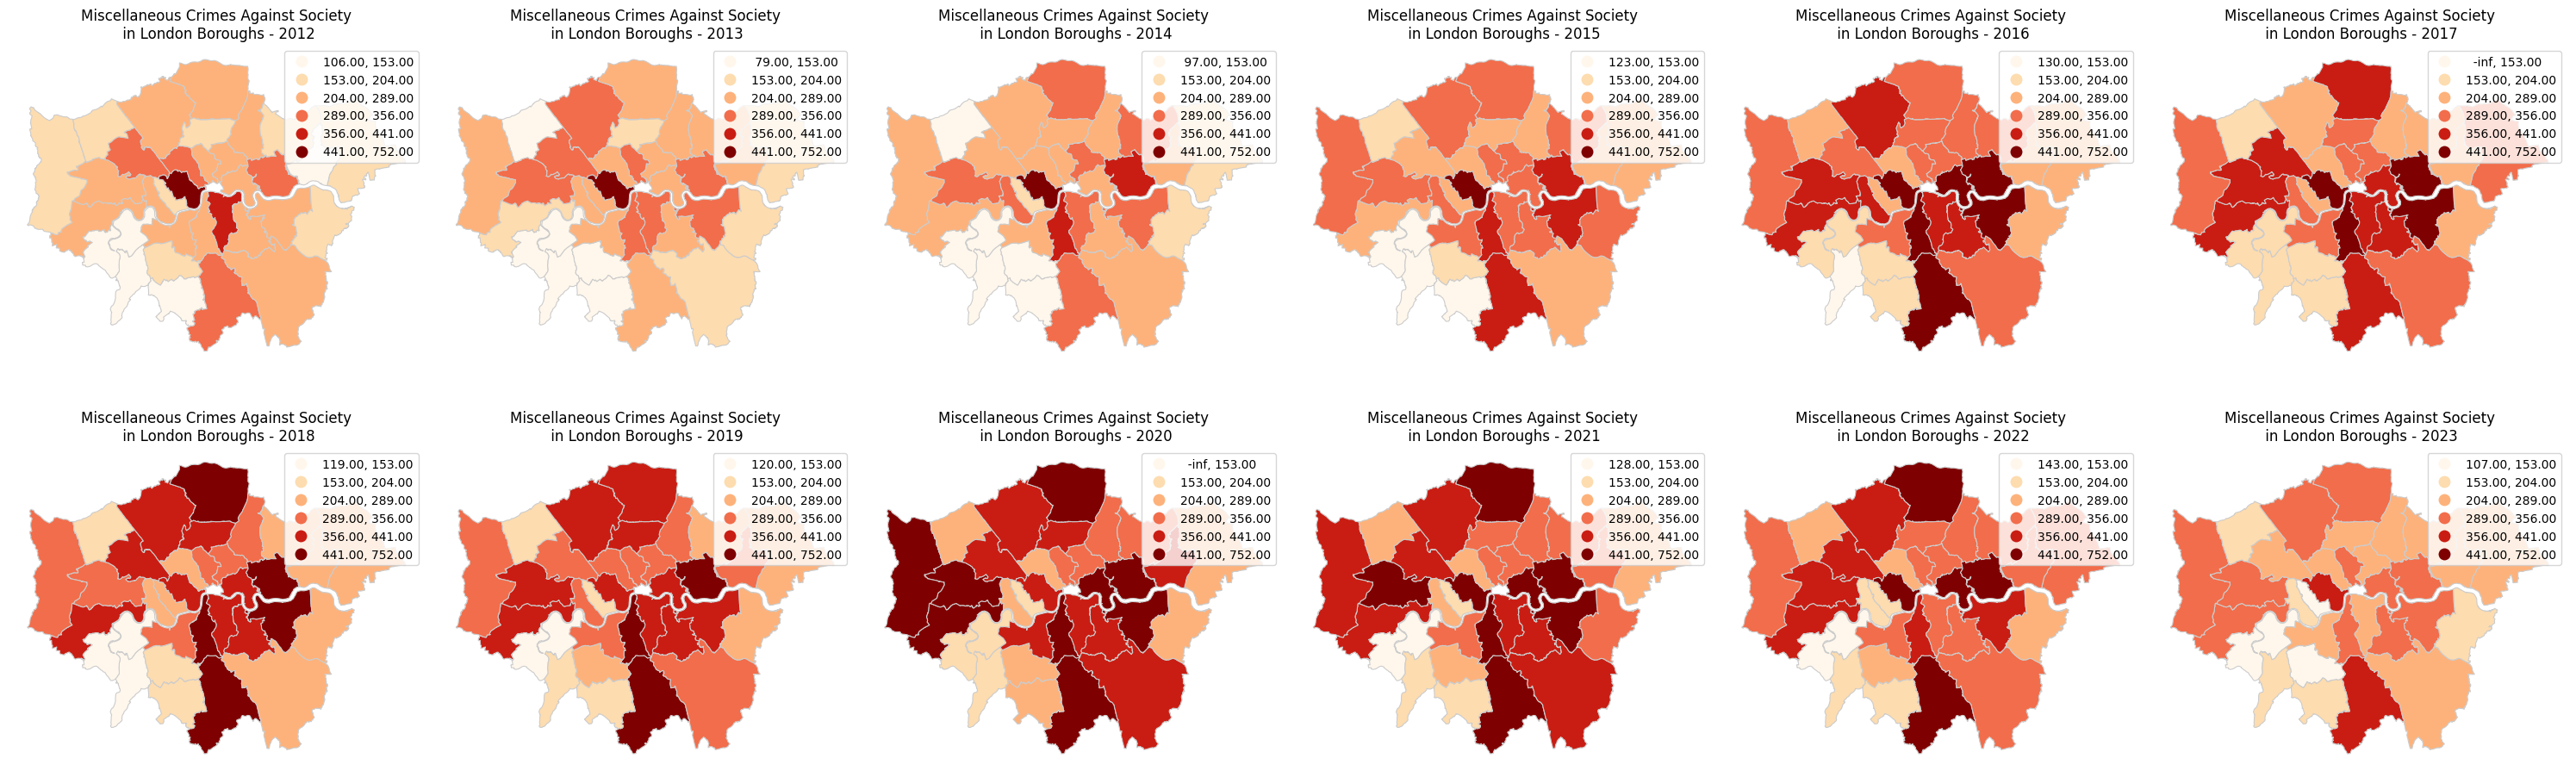

KeyboardInterrupt: 

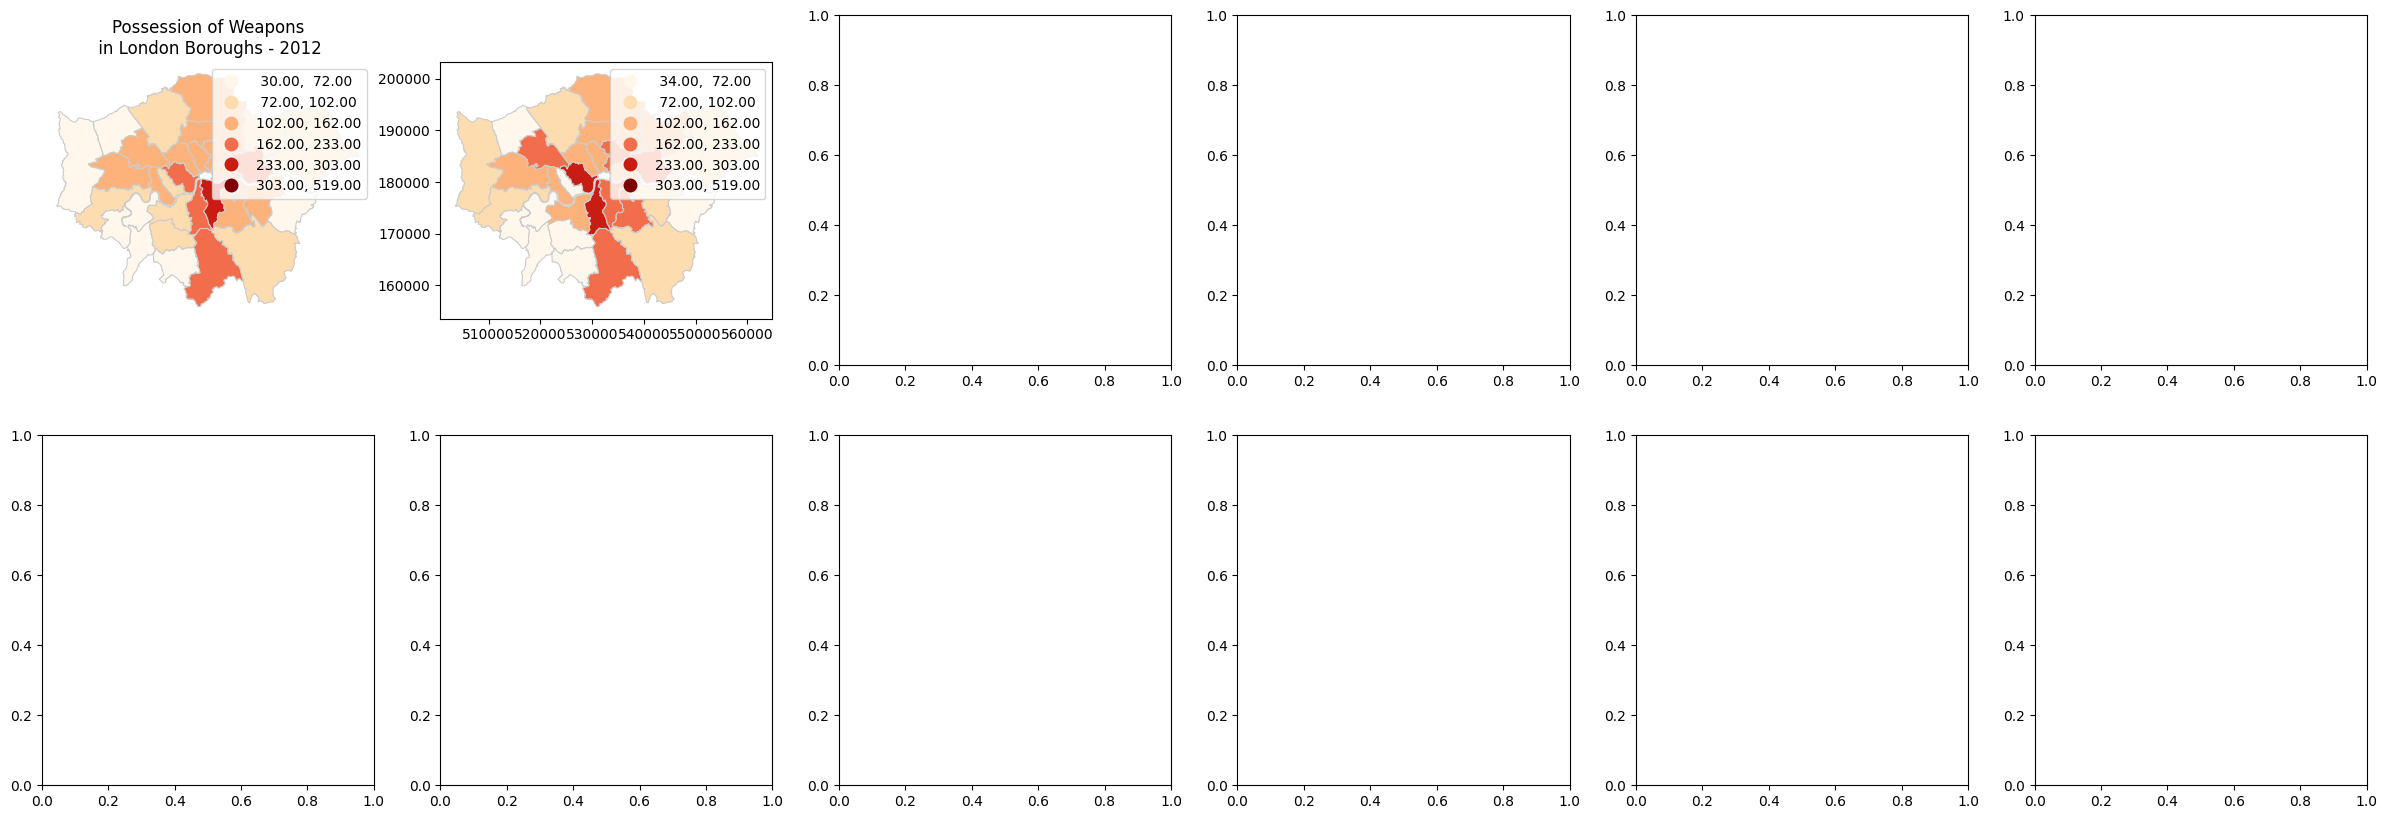

In [206]:
major_categories = yearly_df['MajorText'].unique()

for major_cat in major_categories:
       
       if major_cat == 'Historical Fraud and Forgery':
              continue

       filtered_data = yearly_df[yearly_df['MajorText']==major_cat].copy()

       merged_borough = merge_shape_with_data(shapefile=shapefile_borough, df = filtered_data, index_in_shapefle='NAME', index_in_data='LookUp_BoroughName').fillna(0)
       
       year_columns = [int(year) for year in range(2010, 2024)]

       for year in year_columns:
              if year in merged_borough.columns:
                     merged_borough[year] = 1000*(merged_borough[year] / merged_borough['population'])

       yearly_columns = merged_borough[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
              '2019', '2020', '2021', '2022', '2023']].stack()

       quantiles = yearly_columns.quantile([0.1, 0.25, 0.5, 0.75, 0.9, 1])
       
       plot_yearly_heatmaps_on_grid(merged_borough, 2012, 2023, cutpoints=quantiles.round(0).to_list(), crime = major_cat)